In [135]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings 

warnings.filterwarnings('ignore')

In [136]:
df = pd.read_csv('/kaggle/input/pokemon-go/pokemon.csv')

In [137]:
df.columns

Index(['pokemon_id', 'pokemon_name', 'base_attack', 'base_defense',
       'base_stamina', 'type', 'rarity', 'charged_moves', 'fast_moves',
       'candy_required', 'distance', 'max_cp', 'attack_probability',
       'base_capture_rate', 'base_flee_rate', 'dodge_probability',
       'max_pokemon_action_frequency', 'min_pokemon_action_frequency',
       'found_egg', 'found_evolution', 'found_wild', 'found_research',
       'found_raid', 'found_photobomb'],
      dtype='object')

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pokemon_id                    1007 non-null   int64  
 1   pokemon_name                  1007 non-null   object 
 2   base_attack                   1007 non-null   int64  
 3   base_defense                  1007 non-null   int64  
 4   base_stamina                  1007 non-null   int64  
 5   type                          1007 non-null   object 
 6   rarity                        1007 non-null   object 
 7   charged_moves                 1007 non-null   object 
 8   fast_moves                    1007 non-null   object 
 9   candy_required                471 non-null    float64
 10  distance                      1007 non-null   int64  
 11  max_cp                        1007 non-null   int64  
 12  attack_probability            904 non-null    float64
 13  bas

In [139]:
df.head(3)

,pokemon_id,pokemon_name,base_attack,base_defense,base_stamina,type,rarity,charged_moves,fast_moves,candy_required,...,base_flee_rate,dodge_probability,max_pokemon_action_frequency,min_pokemon_action_frequency,found_egg,found_evolution,found_wild,found_research,found_raid,found_photobomb
0,1,Bulbasaur,118,111,128,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Seed Bomb', 'Power Whip']","['Vine Whip', 'Tackle']",NaN,...,-1.0,0.15,1.6,0.2,True,False,True,True,True,True
1,2,Ivysaur,151,143,155,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Solar Beam', 'Power Whip']","['Razor Leaf', 'Vine Whip']",25.0,...,-1.0,0.15,1.6,0.2,False,True,True,True,True,True
2,3,Venusaur,198,189,190,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Petal Blizzard', 'Solar Beam']","['Razor Leaf', 'Vine Whip']",100.0,...,-1.0,0.15,1.6,0.2,False,True,True,True,True,True


In [140]:
df.isna().sum()

pokemon_id                        0
pokemon_name                      0
base_attack                       0
base_defense                      0
base_stamina                      0
type                              0
rarity                            0
charged_moves                     0
fast_moves                        0
candy_required                  536
distance                          0
max_cp                            0
attack_probability              103
base_capture_rate               103
base_flee_rate                  103
dodge_probability               103
max_pokemon_action_frequency    103
min_pokemon_action_frequency    103
found_egg                       263
found_evolution                 263
found_wild                      263
found_research                  263
found_raid                      263
found_photobomb                 263
dtype: int64

In [141]:
df['base_capture_rate'].fillna(df['base_capture_rate'].mean(), inplace=True)
df['base_flee_rate'].fillna(df['base_flee_rate'].mean(), inplace=True)
df['dodge_probability'].fillna(df['dodge_probability'].mean(), inplace=True)
df['attack_probability'].fillna(df['attack_probability'].mean(), inplace=True)

df['candy_required'].fillna(0, inplace=True)

df['max_pokemon_action_frequency'].fillna(df['max_pokemon_action_frequency'].mean(), inplace=True)
df['min_pokemon_action_frequency'].fillna(df['min_pokemon_action_frequency'].mean(), inplace=True)

df['found_evolution'].fillna(False, inplace=True)
df['found_research'].fillna(False, inplace=True)
df['found_raid'].fillna(False, inplace=True)
df['found_photobomb'].fillna(False, inplace=True)
df['found_wild'].fillna(False, inplace=True)
df['found_egg'].fillna(False, inplace=True)

In [142]:
df.isna().sum()

pokemon_id                      0
pokemon_name                    0
base_attack                     0
base_defense                    0
base_stamina                    0
type                            0
rarity                          0
charged_moves                   0
fast_moves                      0
candy_required                  0
distance                        0
max_cp                          0
attack_probability              0
base_capture_rate               0
base_flee_rate                  0
dodge_probability               0
max_pokemon_action_frequency    0
min_pokemon_action_frequency    0
found_egg                       0
found_evolution                 0
found_wild                      0
found_research                  0
found_raid                      0
found_photobomb                 0
dtype: int64

In [143]:
df = pd.get_dummies(df, columns=['type', 'charged_moves', 'fast_moves'])

In [144]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['rarity'] = le.fit_transform(df['rarity'])

In [145]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['base_attack', 'base_defense', 'base_stamina', 'max_cp']] = scaler.fit_transform(df[['base_attack', 'base_defense', 'base_stamina', 'max_cp']])


In [146]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
df[['base_attack', 'base_defense', 'base_stamina', 'max_cp']] = minmax_scaler.fit_transform(df[['base_attack', 'base_defense', 'base_stamina', 'max_cp']])


In [147]:
df['total_stats'] = df['base_attack'] + df['base_defense'] + df['base_stamina']

In [148]:
df['cp_efficiency'] = df['total_stats'] / df['max_cp']

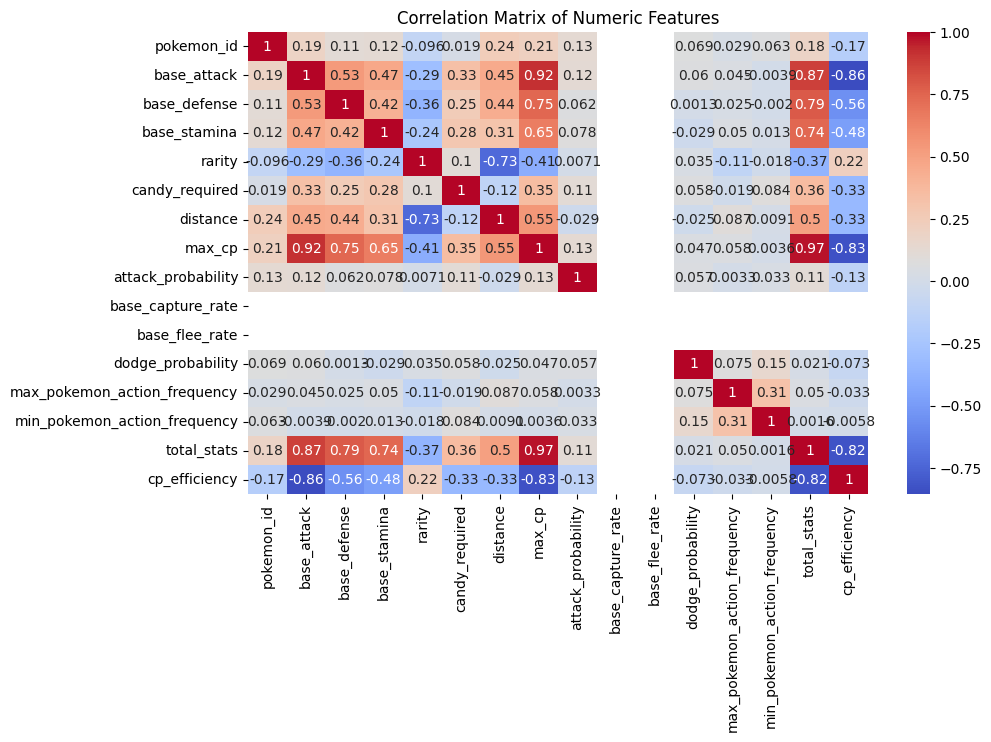

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plotting correlation matrix
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [150]:
# Dropping redundant features based on high correlation
df = df.drop(columns=['base_attack', 'base_defense', 'base_stamina', 'max_cp'])


In [151]:
from sklearn.preprocessing import StandardScaler

# Selecting numeric columns that require scaling
numeric_cols = ['total_stats', 'candy_required', 'distance', 
                'attack_probability', 'base_capture_rate', 
                'base_flee_rate', 'dodge_probability', 
                'max_pokemon_action_frequency', 'min_pokemon_action_frequency', 
                'cp_efficiency']

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [155]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

columns_to_drop = ['rarity_class', 'pokemon_name', 'type']  # Add or remove columns as needed
existing_columns = [col for col in columns_to_drop if col in df.columns]

# Dropping columns that exist in the DataFrame
X = df.drop(columns=existing_columns, errors='ignore')
y = df['rarity_class']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the RandomForest model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_resampled, y_resampled)

# Make predictions and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      common       1.00      1.00      1.00       201
        rare       1.00      1.00      1.00         1

    accuracy                           1.00       202
   macro avg       1.00      1.00      1.00       202
weighted avg       1.00      1.00      1.00       202

